Midhun K Murali

In [1]:
import pandas as pd

1. Reading the Two csv files

In [2]:
male=pd.read_csv("nhanes_adult_male_bmx_2020.csv")
female=pd.read_csv("nhanes_adult_female_bmx_2020.csv")

Getting the info of both the csv files

In [3]:
male.info()
female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXWT     4081 non-null   float64
 1   BMXHT     4081 non-null   float64
 2   BMXARML   4081 non-null   float64
 3   BMXLEG    4081 non-null   float64
 4   BMXARMC   4081 non-null   float64
 5   BMXHIP    4081 non-null   float64
 6   BMXWAIST  4081 non-null   float64
dtypes: float64(7)
memory usage: 223.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4221 entries, 0 to 4220
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXWT     4221 non-null   float64
 1   BMXHT     4221 non-null   float64
 2   BMXARML   4221 non-null   float64
 3   BMXLEG    4221 non-null   float64
 4   BMXARMC   4221 non-null   float64
 5   BMXHIP    4221 non-null   float64
 6   BMXWAIST  4221 non-null   float64
dtypes: float64(7)
memory usage: 231.0 KB


Viewing the male.csv file

In [4]:
male.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0


Viewing the female.csv file

In [5]:
female.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2


Checking if there is any null values in male.csv file

In [6]:
male.isna().sum()

BMXWT       0
BMXHT       0
BMXARML     0
BMXLEG      0
BMXARMC     0
BMXHIP      0
BMXWAIST    0
dtype: int64

There was no null values present in the file

Checking if there is any null values in female.csv file

In [7]:
female.isna().sum()

BMXWT       0
BMXHT       0
BMXARML     0
BMXLEG      0
BMXARMC     0
BMXHIP      0
BMXWAIST    0
dtype: int64

There was no null values present in the file

2.  Reading the two files as numpy matrices named male and female.

In [8]:
female_numpy=female.to_numpy()
male_numpy=male.to_numpy()

In [9]:
female_numpy.shape
male_numpy.shape

(4081, 7)

Both the files were successfully read as numpy matrices and it's shaped was viewed.

3. Creating two Histograms on a single plot for female(top subplot) and male(bottom subplot) weights which has a identical xaxis for both the figures.

(27.6, 209.6)

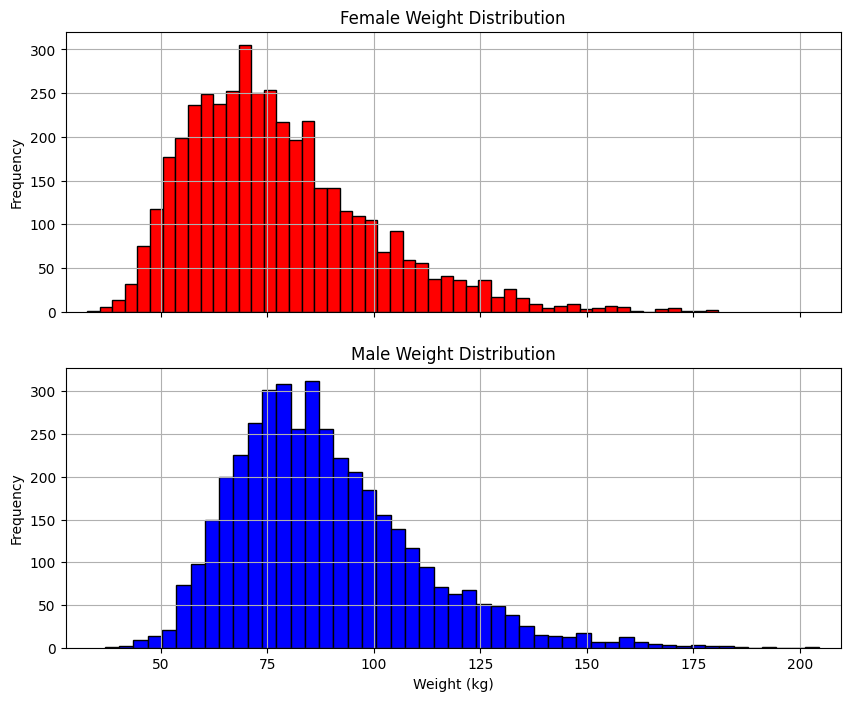

In [10]:
import matplotlib.pyplot as plt

# To extract weights from column 0
female_weights = female_numpy[:, 0]
male_weights = male_numpy[:, 0]

# To Determine shared x-axis limits
min_weight = min(female_weights.min(), male_weights.min())
max_weight = max(female_weights.max(), male_weights.max())

# Creating both subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
bins = 50

# Histogram for female weights , Top subplot
ax1.hist(female_weights, bins=bins, color='red', edgecolor='black')
ax1.set_title("Female Weight Distribution")
ax1.set_ylabel("Frequency")
ax1.grid(True)

# Histogram for male weights, Bottom subplot
ax2.hist(male_weights, bins=bins, color='blue', edgecolor='black')
ax2.set_title("Male Weight Distribution")
ax2.set_xlabel("Weight (kg)")
ax2.set_ylabel("Frequency")
ax2.grid(True)

# plt.xlim for indentical xaxis for both the subplots
plt.xlim(min_weight - 5, max_weight + 5)

Both the weights were successfully converted to two histogram on a single plot.
The female subplot was slightly skewed right with more individuals with less weight and few individuals with higher weights.
The male subplot has a higher central mass generally higher weights amoung men.

4. To draw a box-and-whisker plot, with two boxes side by side, giving the male and female weights so that they can be compared to each other. 

C:\Users\midhu\AppData\Local\Temp\ipykernel_23212\1515428730.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])


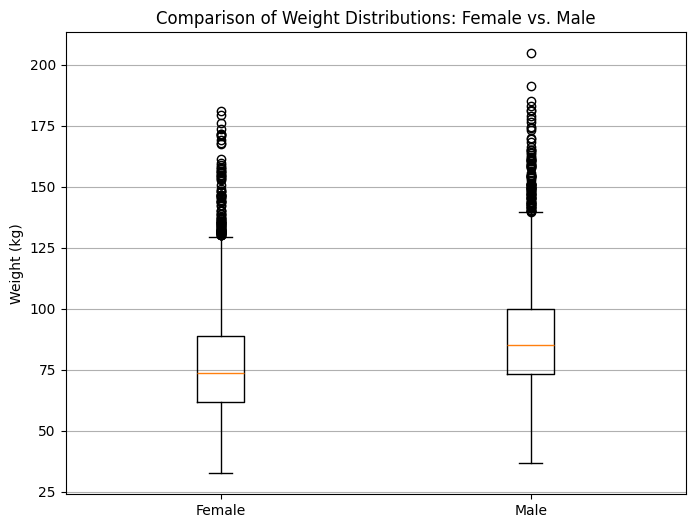

In [11]:
import matplotlib.pyplot as plt

# To extract weights from column 0
female_weights = female_numpy[:, 0]
male_weights = male_numpy[:, 0]

# Box and whisker plot creation
plt.figure(figsize=(8, 6))
plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])

plt.title("Comparison of Weight Distributions: Female vs. Male")
plt.ylabel("Weight (kg)")
plt.grid(True, axis='y')
plt.show()

The median of male is higher than that of female indicating that male weigh more than female. 
Both groups have whisker tips beyond the box, but they are more in the male dataset suggesting that some individuals have wiehts more than average.

5. Computing the basic numerical aggregates of the male and female weights for comparing both distributions.

In [12]:
import numpy as np
from scipy.stats import skew, iqr

# To extract weights from column 0
female_weights = female_numpy[:, 0]
male_weights = male_numpy[:, 0]

# Funtion for computing basic numerical aggregates
def describe_weights(weights):
    return {
        "Mean": np.mean(weights),
        "Median": np.median(weights),
        "Std Deviation": np.std(weights),
        "Min": np.min(weights),
        "Max": np.max(weights),
        "Range": np.max(weights) - np.min(weights),
        "IQR": iqr(weights),
        "Skewness": skew(weights)
    }

# Using the function for computation of both the groups
female_stats = describe_weights(female_weights)
male_stats = describe_weights(male_weights)

# Converting to dataframes
import pandas as pd
summary_df = pd.DataFrame([female_stats, male_stats], index=["Female", "Male"]).round(2)
summary_df

,Mean,Median,Std Deviation,Min,Max,Range,IQR,Skewness
Female,77.40,73.6,21.54,32.6,180.9,148.3,27.1,1.03
Male,88.36,85.0,21.42,36.8,204.6,167.8,26.5,0.98


The mean and median of male is higher than that of female, confirming that male have higher weights compared to female, confirming what we saw visually back there. 
Both the groups are right skewed but skeweness is slightly more prominent in males. 
In case of dispersion male weights have a high standard deviation and range indication more variability. 

In [13]:
female.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2


6. To add a eight column in the female matrix which gives the body mass indices of all 
the female participants.

In [14]:
# To extract weight and height of females
female_weights = female_numpy[:, 0]
female_heights_cm = female_numpy[:, 1]

# To convert height from cm to m for bmi calculation
female_heights_m = female_heights_cm / 100

# Bmi Equation
female_bmi = female_weights / (female_heights_m ** 2)

# Add new column
female_with_bmi = np.hstack([female, female_bmi.reshape(-1, 1)])
columns=["BMXWT","BMXHT","BMXARML","BMXLEG","BMXARMC","BMXHIP","BMXWAIST","BMXBMI"]
female_with_bmi=pd.DataFrame(female_with_bmi,columns=columns)
female_with_bmi.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,BMXBMI
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9,37.835041
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1,39.069720
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0,28.092655
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5,24.904378
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2,23.178791


The formula BMI = Weight(kg)/(Height(m))^2 was used to calculate the body mass indices of all 
the female participants. An eight column BMXBMI was added to the female matrix as a result.

7. To Create a new matrix zfemale being a version of the female dataset with all its columns 
standardised (by computing the z-scores of each column).

In [15]:
female_matrix = female_with_bmi.to_numpy()

# Computing mean and std of individual columns
means = np.mean(female_matrix, axis=0)
stds = np.std(female_matrix, axis=0)

# Equation for zscore calculation
zscore = (female_matrix - means) / stds

# Creating the new matriz zfemale
columns=["zBMXWT","zBMXHT","zBMXARML","zBMXLEG","zBMXARMC","zBMXHIP","zBMXWAIST","zBMXBMI"]
zfemale = pd.DataFrame(zscore, columns=columns)

zfemale.head()


,zBMXWT,zBMXHT,zBMXARML,zBMXLEG,zBMXARMC,zBMXHIP,zBMXWAIST,zBMXBMI
0,0.914295,0.008950,-0.567395,1.132988,0.550845,1.083162,1.115785,0.996968
1,0.635776,-1.053068,-1.078931,-1.293492,1.032218,1.044755,0.265089,1.156175
2,-0.204423,0.150553,0.583563,0.261944,-0.162299,-0.190647,-0.372933,-0.259275
3,-0.728968,-0.387537,0.839332,-0.764643,-0.661500,-0.523501,-0.459152,-0.670391
4,-1.021413,-0.784024,-0.610023,-0.982404,-0.786301,-1.067590,-1.453546,-0.892899


A new matrix zfemale was created by adding zscore values of columns in the female matrix. 

8. To Draw a scatterplot matrix (pairplot) for the standardised versions of height, weight, 
waist circumference, hip circumference, and BMI of the zfemale matrix and Calculate Pearson’s and Spearman’s correlation coefficients for all pairs of variables.

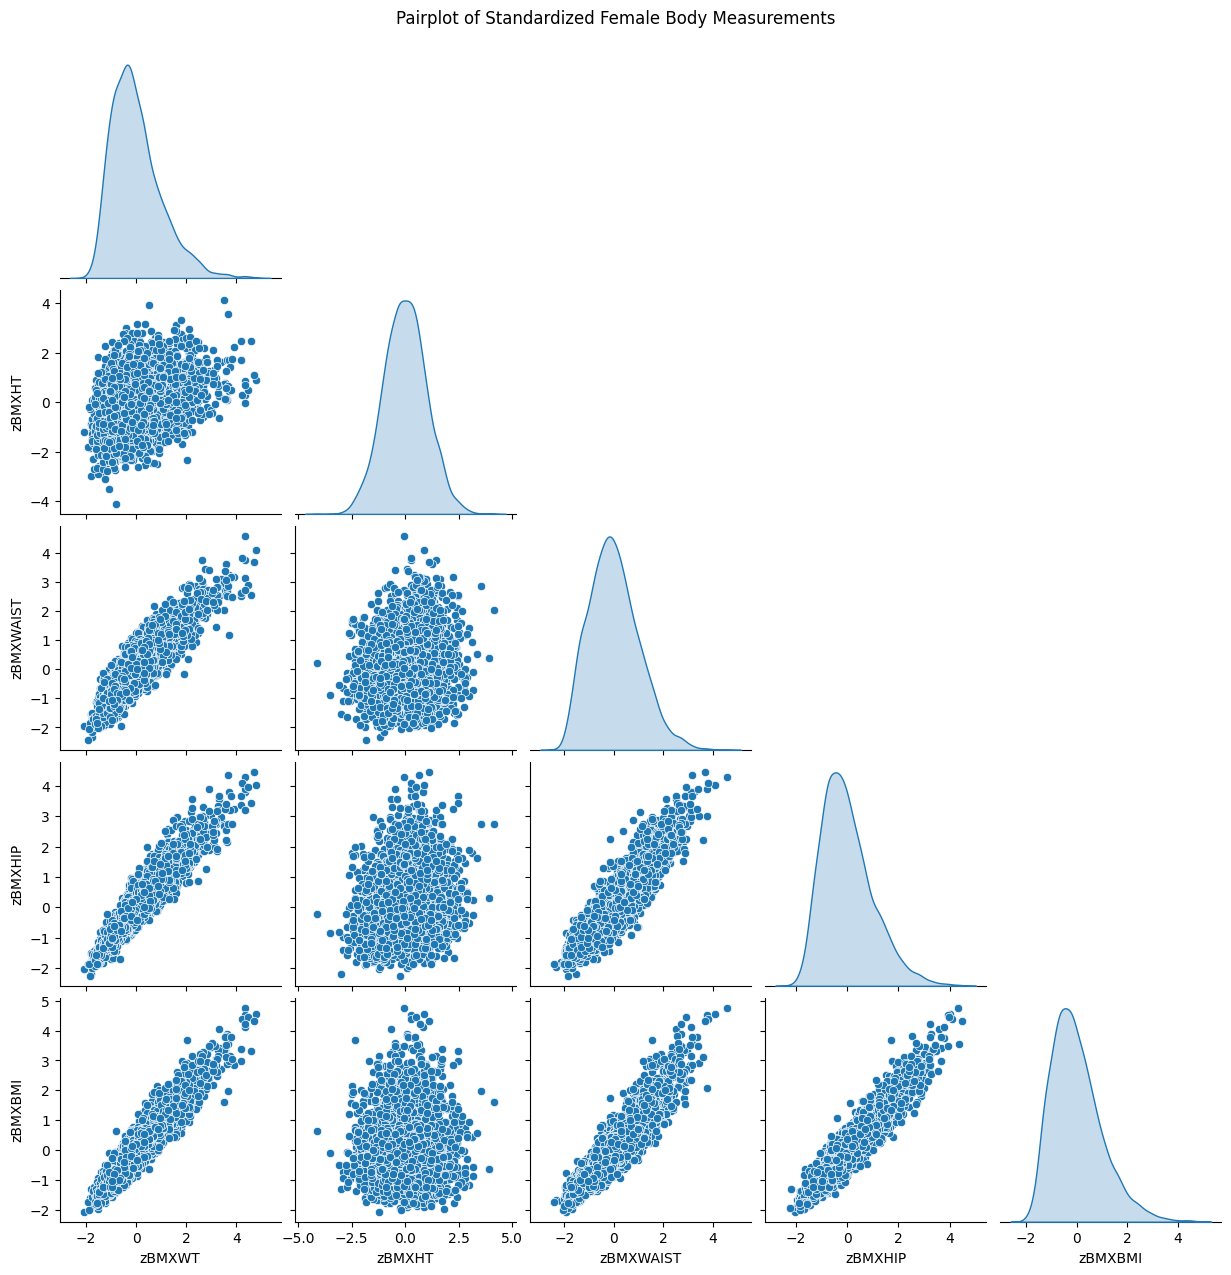

Pearson Correlation Matrix:
           zBMXWT  zBMXHT  zBMXWAIST  zBMXHIP  zBMXBMI
zBMXWT       1.00    0.35       0.90     0.95     0.95
zBMXHT       0.35    1.00       0.13     0.20     0.03
zBMXWAIST    0.90    0.13       1.00     0.90     0.92
zBMXHIP      0.95    0.20       0.90     1.00     0.94
zBMXBMI      0.95    0.03       0.92     0.94     1.00

Spearman Correlation Matrix:
           zBMXWT  zBMXHT  zBMXWAIST  zBMXHIP  zBMXBMI
zBMXWT       1.00    0.34       0.90     0.95     0.94
zBMXHT       0.34    1.00       0.11     0.21     0.02
zBMXWAIST    0.90    0.11       1.00     0.89     0.92
zBMXHIP      0.95    0.21       0.89     1.00     0.93
zBMXBMI      0.94    0.02       0.92     0.93     1.00


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select required columns from zfemale
columns_to_plot = [
    "zBMXWT", 
    "zBMXHT", 
    "zBMXWAIST", 
    "zBMXHIP", 
    "zBMXBMI"
]

subset_df = zfemale[columns_to_plot]

# Pairplot implementation
sns.pairplot(subset_df, diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Standardized Female Body Measurements", y=1.02)
plt.show()

# Pearson Correlation Calculation
pearson_corr = subset_df.corr(method='pearson')

# Spearman Correlation Calculation
spearman_corr = subset_df.corr(method='spearman')

print("Pearson Correlation Matrix:")
print(pearson_corr.round(2))

print("\nSpearman Correlation Matrix:")
print(spearman_corr.round(2))

A pairplot, Pearson and Spearman Correlation matrixes of the weight, height, waist, hip, bmi was obtained. 
The weight vs bmi has high positive correlation, the waitst vs bmi has strong correlation, the hip vs bmi has also positive but slightly weaker correlation, the height vs bmi has very weak negative correlation and the waist vs weight has a strong correlation.

9. To Compute the waist circumference to height ratio and the waist circumference to hip 
circumference ratio of the male and female participants by adding two more columns to 
the males and females matrices.

In [17]:
import numpy as np
import pandas as pd

# For female matrix
female_waist = female_with_bmi.iloc[:, 6]
female_height = female_with_bmi.iloc[:, 1]
female_hip = female_with_bmi.iloc[:, 5]

female_whtr = female_waist / female_height
female_whr = female_waist / female_hip

# Adding ratio columns to female matrix
female_with_ratios = np.hstack([
    female_with_bmi, 
    female_whtr.to_numpy().reshape(-1, 1), 
    female_whr.to_numpy().reshape(-1, 1)
])

# For male matrix
male_waist = male_numpy[:, 6]
male_height = male_numpy[:, 1]
male_hip = male_numpy[:, 5]

male_whtr = male_waist / male_height
male_whr = male_waist / male_hip

# Adding ratio columns to male matrix
male_with_ratios = np.hstack([
    male, 
    male_whtr.reshape(-1, 1), 
    male_whr.reshape(-1, 1)
])

columns=["BMXWT","BMXHT","BMXARML","BMXLEG","BMXARMC","BMXHIP","BMXWAIST","BMXBMI","Waist_to_height","Waist_to_hip"]
female_with_ratios=pd.DataFrame(female_with_ratios,columns=columns)

columns2=["BMXWT","BMXHT","BMXARML","BMXLEG","BMXARMC","BMXHIP","BMXWAIST","Waist_to_height","Waist_to_hip"]
male_with_ratios=pd.DataFrame(male_with_ratios,columns=columns2)

In [18]:
female_with_ratios

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,BMXBMI,Waist_to_height,Waist_to_hip
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9,37.835041,0.735955,0.934972
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1,39.069720,0.675180,0.821514
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0,28.092655,0.570720,0.866290
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5,24.904378,0.574968,0.896040
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2,23.178791,0.473480,0.791351
...,...,...,...,...,...,...,...,...,...,...
4216,66.8,157.0,32.6,38.4,30.7,103.8,92.5,27.100491,0.589172,0.891137
4217,116.9,167.4,42.2,43.0,40.7,128.4,120.0,41.716091,0.716846,0.934579
4218,73.0,159.6,36.2,37.0,31.4,104.6,99.3,28.658740,0.622180,0.949331
4219,78.6,168.5,38.1,40.2,36.0,102.4,98.5,27.683611,0.584570,0.961914


In [19]:
male_with_ratios

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST,Waist_to_height,Waist_to_hip
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4,0.660450,1.112754
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8,0.471227,0.918519
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6,0.591473,1.016698
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3,0.645411,1.017857
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0,0.589207,0.890183
...,...,...,...,...,...,...,...,...,...
4076,114.3,174.5,42.0,35.5,37.0,117.4,119.5,0.684814,1.017888
4077,94.3,178.8,37.8,44.6,35.7,105.3,99.3,0.555369,0.943020
4078,108.8,168.7,38.6,45.6,33.6,118.0,114.7,0.679905,0.972034
4079,79.5,176.4,39.5,42.0,31.4,99.8,97.1,0.550454,0.972946


Two matrics were obtained as a result; A female matrix with 10 columns including bmi and two ratio columns; A male matrix with 9 columns including two ratio matrices.

10. To Draw a box-and-whisker plot with four boxes side by side, comparing the distribution 
of the waistto-height ratio and the waist-to-hip ratio of both male and female participants. 

C:\Users\midhu\AppData\Local\Temp\ipykernel_23212\4215288905.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


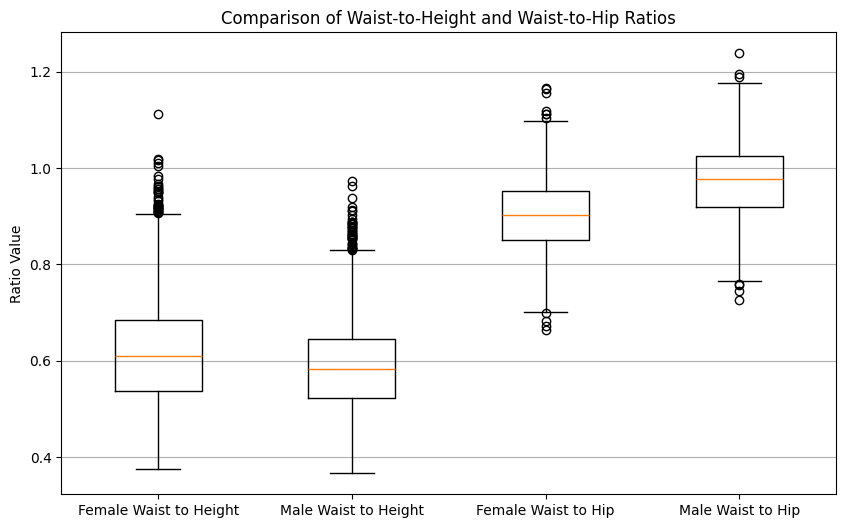

In [20]:
import matplotlib.pyplot as plt

# Extracting data from both matrices
female_whtr = female_with_ratios["Waist_to_height"]
female_whr = female_with_ratios["Waist_to_hip"]
male_whtr = male_with_ratios["Waist_to_height"]
male_whr = male_with_ratios["Waist_to_hip"]

data = [female_whtr, male_whtr, female_whr, male_whr]
labels = [
    "Female Waist to Height", 
    "Male Waist to Height", 
    "Female Waist to Hip", 
    "Male Waist to Hip"
]

# Creation of boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)

plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios")
plt.ylabel("Ratio Value")
plt.grid(True, axis='y')
plt.show()


A box and whisker plot with four boxes side by side was created successfully. 
Both Female and Male waist to heigt ratio has a similar range, but female has a slightly higher median indicating abdominal fat is more common in female groups. 
Male Waist to hip ratio is higher as expected indicating female usually has wider hips compared to males.

11. In your own words, list some advantages and disadvantages of BMI, waist-to-height 
ratio, and waist-to-hip ratio.

BMI: Advanteges of BMI are it can be easily caluculated using height and weight, It can be used for population level studies; Disadvantages of BMI are it does not differentiate between fat and muscle.

Waist To Height ratio: Advantages of Waist to Height ratio are it is highly sensitive to central obesity, it is also applicable across every age groups; Diadvantages of Waist to Height to ratio are mainly it requires very accurate waist measurements and not commonly used in clinical practice.

Waist To Hip Ratio: Advantages of Waist to Hip ratio are it can be used to highlight fat distribution patterns, can be used for understanding body shape; Diadvantages of Waist to Hip ratio are that it is less predictive, can easily vary due to body shape or gender.

12. To Print out the standardised body measurements for the 5 persons with the lowest BMI 
and the 5 persons with the 5 highest BMI. 

In [21]:
import numpy as np

# To get the index position of the BMI zscores
bmi_col_index = zfemale.columns.get_loc("zBMXBMI")

# sort indices with argsort 
sorted_indices = np.argsort(zfemale.iloc[:, bmi_col_index])

# To select persons with five lowest and highest bmi
lowest_bmi_indices = sorted_indices[:5]
highest_bmi_indices = sorted_indices[-5:]
extreme_indices = np.concatenate([lowest_bmi_indices, highest_bmi_indices])
extreme_bmi_cases = zfemale.iloc[extreme_indices]

extreme_bmi_cases.round(2)


,zBMXWT,zBMXHT,zBMXARML,zBMXLEG,zBMXARMC,zBMXHIP,zBMXWAIST,zBMXBMI
262,-2.08,-1.22,-1.55,-1.17,-2.19,-2.04,-1.94,-2.05
3478,-1.88,-0.19,-1.72,0.39,-2.44,-1.85,-2.06,-1.99
2126,-1.54,1.81,0.63,0.57,-2.27,-1.68,-1.71,-1.97
2753,-1.84,-0.26,-0.23,0.51,-2.30,-2.25,-1.86,-1.94
1209,-1.61,0.89,-0.10,0.48,-2.21,-1.83,-1.71,-1.89
2268,4.25,0.29,1.86,-0.98,2.37,4.10,3.82,4.40
3022,4.46,0.50,1.69,-1.14,3.35,3.98,2.90,4.46
1472,4.35,0.28,2.84,1.94,4.37,3.92,3.75,4.51
1104,4.80,0.89,2.12,1.82,3.78,4.02,4.08,4.54
1096,4.36,-0.03,-0.06,-0.17,2.78,4.32,4.57,4.76


The standardised body measurements for the 5 persons with the lowest BMI 
and the 5 persons with the 5 highest BMI was retrieved. 
Individuals with lowest bmi has very low weight, waist or hip circumference and shorter height. 
Whereas individuals with highest bmi often have very high weight, waist or hip circumference but average height confirming that BMI is more driven by mass.